# Exam 3: Data Mining, Regression and Classification

# Setup

In [39]:
import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Read Cities.csv into dataframe, add column for temperature category
# Note: For a dataframe D and integer i, D.ix[i] is the i-th row of D
f = open('Cities.csv','rU')
cities = pd.read_csv(f)
print len(cities)
cats = []
for i in range(len(cities)):
    if cities.iloc[i]['temperature'] < 5:
        cats.append('cold')
    elif cities.iloc[i]['temperature'] < 9:
        cats.append('cool')
    elif cities.iloc[i]['temperature'] < 15:
        cats.append('warm')
    else: cats.append('hot')
cities['category'] = cats
print "cold:", len(cities[(cities.category == 'cold')])
print "cool:", len(cities[(cities.category == 'cool')])
print "warm:", len(cities[(cities.category == 'warm')])
print "hot:", len(cities[(cities.category == 'hot')])

213
cold: 17
cool: 92
warm: 79
hot: 25


# Problem 1 (K-NN Classification)
위에서 만든 dataframe인 cities를 편집하여 country가 Germany, Spain, France, Romania인 데이터만 갖는 새로운 dataframe을 만드시오. 이 dataframe을 city 이름의 오름차순으로 정렬하고 첫 10개를 출력하시오. 이 dataframe의 상위 90%를 training data로 사용하고 나머지는 test data로 사용하여 K-NN classification을 수행하시오. 이 때 K 값을 2부터 10까지 변화시켜 가며 training accuracy와 test accuracy를 계산하여 K 값과 두 accuracy 값을 출력하시오. 그리고 9개의 K 값중 training accuracy와 test accuracy 차의 절대값이 가장 작은 K값과 그 때의 차의 절대값을 출력하시오. 아래 각 cell에 지정된 부분을 수행하는 code를 넣으시오.

### (a) 위에서 만든 dataframe인 cities를 편집하여 country가 Germany, Spain, France, Romania인 데이터만 갖는 새로운 dataframe을 만들고 그 크기를 출력하시오.

In [41]:
cities = cities[(cities.country=='Germany') | (cities.country =='Spain') | (cities.country=='France') | (cities.country=='Romania')]
print len(cities)

59


### (b) 이 dataframe을 city 이름의 오름차순으로 정렬하고 첫 10개를 출력하시오.

In [42]:
cities = cities.sort_values(by='city')
print cities[:10]

         city  country  latitude  longitude  temperature category
4    Albacete    Spain     39.00      -1.87        12.62     warm
5   Algeciras    Spain     36.13      -5.47        17.38      hot
6      Amiens   France     49.90       2.30        10.17     warm
10     Angers   France     47.48      -0.53        10.98     warm
13       Arad  Romania     46.17      21.32         9.32     warm
15   Augsburg  Germany     48.35      10.90         4.54     cold
16      Bacau  Romania     46.58      26.92         7.51     cool
17    Badajoz    Spain     38.88      -6.97        15.61      hot
18  Baia Mare  Romania     47.66      23.58         8.87     cool
20  Barcelona    Spain     41.38       2.18        15.78      hot


### (c) 이 dataframe의 상위 90%를 training data로 사용하고 나머지는 test data로 사용하며 training data와 test data의 갯수를 출력하시오.

In [43]:
# Create training and test sets for cities data
num_items = len(cities)
percent_train = 0.9
num_train = int(num_items*percent_train)
num_test = num_items - num_train
print 'Training set', num_train, 'items'
print'Test set', num_test, 'items'
citiesTrain = cities[0:num_train]
citiesTest = cities[num_train:]

Training set 53 items
Test set 6 items


### (d) 위의 데이터에 대하여 K-NN classification을 수행하시오. 이 때 K 값을 2부터 10까지 변화시켜 가며 training accuracy와 test accuracy를 계산하여 K 값과 두 accuracy 값을 출력하시오. 그리고 9개의 K 값중 training accuracy와 test accuracy 차의 절대값이 가장 작은 K값과 그 때의 차의 절대값을 출력하시오. accuracy값과 절대값을 출력할때 소수점이하 4자리까지만 하시오.  pandas에서 절대값 함수는 abs()이며 소수점이하 4자리까지의 출력은 print '{0:.4f}'.format(출력변수 또는 수식) 형식을 사용하면 됨.

In [44]:
# Predict temperature category from other features
features = ['longitude', 'latitude', 'temperature']
minimum = 100
for i in range(9):
  # Create classfier
  neighbors = i+2 # Number of neighbors to consider for k nearest neighbor classification
  print 'K = ', neighbors
  classifier = KNeighborsClassifier(n_neighbors=neighbors)

  # Train the classifier on training data
  classifier.fit(citiesTrain[features], citiesTrain['category'])

  # Make predictions on training data
  train_predictions = classifier.predict(citiesTrain[features])

  # Make predictions on test data
  test_predictions = classifier.predict(citiesTest[features])

  num_train = len(citiesTrain)
  num_test = len(citiesTest)
  # Calculate training accuracy
  train_correct = 0
  for i in range(num_train):
      #print 'Predicted:', train_predictions[i], ' Actual:', citiesTrain.iloc[i]['category']
      if train_predictions[i] == citiesTrain.iloc[i]['category']: train_correct +=1
  train_accuracy = float(train_correct)/float(num_train)
  print 'Training Accuracy: {0:.4f}' .format(train_accuracy)

  # Calculate test accuracy
  test_correct = 0
  for i in range(num_test):
      #print 'Predicted:', test_predictions[i], ' Actual:', citiesTest.iloc[i]['category']
      if test_predictions[i] == citiesTest.iloc[i]['category']: test_correct +=1
  test_accuracy = float(test_correct)/float(num_test)
  print 'Test Accuracy: {0:.4f}' .format(test_accuracy)

  if minimum > abs(train_accuracy - test_accuracy): 
     minimum = abs(train_accuracy - test_accuracy)
     min_k = neighbors
  print 'accuracy difference = {0:.4f}'.format(abs(train_accuracy - test_accuracy))
  print ""
print 'minimum accuracy K = ', min_k,', minimum accuracy difference = {0:.4f}' .format(minimum)
  # Comment out print, try other values for neighbors, other features

K =  2
Training Accuracy: 0.9434
Test Accuracy: 0.8333
accuracy difference = 0.1101

K =  3
Training Accuracy: 0.9811
Test Accuracy: 0.8333
accuracy difference = 0.1478

K =  4
Training Accuracy: 0.9811
Test Accuracy: 0.8333
accuracy difference = 0.1478

K =  5
Training Accuracy: 0.9811
Test Accuracy: 1.0000
accuracy difference = 0.0189

K =  6
Training Accuracy: 0.9434
Test Accuracy: 1.0000
accuracy difference = 0.0566

K =  7
Training Accuracy: 0.9057
Test Accuracy: 0.8333
accuracy difference = 0.0723

K =  8
Training Accuracy: 0.8868
Test Accuracy: 0.8333
accuracy difference = 0.0535

K =  9
Training Accuracy: 0.9057
Test Accuracy: 0.8333
accuracy difference = 0.0723

K =  10
Training Accuracy: 0.8491
Test Accuracy: 1.0000
accuracy difference = 0.1509

minimum accuracy K =  5 , minimum accuracy difference = 0.0189


# Problem 2
Movies.csv의 데이터를 이용하여 frequent itemsets of two, frequent itemsets of three, frequent itemsets of four를 출력하는 python 프로그램을 작성하시오. 단, support threshold는 0.03임.(0.3이 아님!!!) 만약 맞게 프로그램했다면 20개의 frequent itemsets of two, 14개의 frequent itemsets of three, 3개의  frequent itemsets of four가 찾아져야 함. 아래 각 cell에 지정된 부분을 수행하는 code를 넣으시오.

### (a) Frequent itemsets of two
모든 frequent itemsets of two와 그것의 갯수를 출력하시오

In [45]:
transactions={} # dictionary from TID to list of items
items={} # dictionary from item to list of TIDs
with open('Movies.csv', 'rU') as csvfile:
    data = csv.reader(csvfile)
    for row in data:
        if row[0] not in transactions: transactions[row[0]]=[row[1]]
        else: transactions[row[0]].append(row[1])
        if row[1] not in items: items[row[1]]=[row[0]]
        else: items[row[1]].append(row[0])
numtransactions = len(transactions)

# compute all pairs of items, alphabetical
pairs = []
for i1 in items:
    for i2 in items:
        if i1<i2: pairs.append([i1,i2,0])
            
# append number of transactions containing each pair
for p in pairs:
    for t in transactions:
        if p[0] in transactions[t] and p[1] in transactions[t]: p[2] += 1

# compute frequent itemsets of two
frequent2 = []
for p in pairs:
    if float(p[2])/float(numtransactions) > .03: frequent2.append(p)
print 'FREQUENT ITEMSETS OF TWO:'
for f in frequent2: print ' ', f[0], f[1]
print len(frequent2)

FREQUENT ITEMSETS OF TWO:
  Gone Girl Inside Out
  Gone Girl The Imitation Game
  Gone Girl The Fault in Our Stars
  Big Hero 6 Gone Girl
  Big Hero 6 Inside Out
  Big Hero 6 The Imitation Game
  Big Hero 6 The Fault in Our Stars
  Big Hero 6 Boyhood
  Big Hero 6 Fury
  Inside Out The Imitation Game
  The Imitation Game Wild Tales
  The Fault in Our Stars The Imitation Game
  Boyhood Gone Girl
  Boyhood Inside Out
  Boyhood The Imitation Game
  Boyhood The Fault in Our Stars
  Boyhood Fury
  Fury Gone Girl
  Fury Inside Out
  Fury The Imitation Game
20


### (b) Frequent itemsets of three
모든 frequent itemsets of three와 그것의 갯수를 출력하시오. frequent itemsets of three의 three중 2개는 반드시 앞에서 계산한 frequent itemsets of two에 속해야 함. 즉, frequent itemsets of three를 계산할 때는 frequent itemsets of two에 한 개를 더 붙이는 형식이 되어야 한다는 뜻임.

In [46]:
# compute all triples of items where first two are in frequent itemsets of two,
# alphabetical
triples = []
for f in frequent2:
    for i in items:
        if f[0] < i and f[1] < i: triples.append([f[0],f[1],i,0])

# append number of transactions containing each triple
for tr in triples:
    for t in transactions:
        if tr[0] in transactions[t] and tr[1] in transactions[t] \
        and tr[2] in transactions[t]: tr[3] += 1

# compute frequent itemsets of three
frequent3 = []
for t in triples:
    if float(t[3])/float(numtransactions) > .03: frequent3.append(t)
print 'FREQUENT ITEMSETS OF THREE:'
for f in frequent3: print ' ', f[0], f[1], f[2]
print len(frequent3)

FREQUENT ITEMSETS OF THREE:
  Gone Girl Inside Out The Imitation Game
  Big Hero 6 Gone Girl Inside Out
  Big Hero 6 Gone Girl The Imitation Game
  Big Hero 6 Inside Out The Imitation Game
  Big Hero 6 Boyhood Gone Girl
  Big Hero 6 Boyhood The Imitation Game
  Big Hero 6 Fury Gone Girl
  Big Hero 6 Fury The Imitation Game
  Boyhood Gone Girl Inside Out
  Boyhood Gone Girl The Imitation Game
  Boyhood Inside Out The Imitation Game
  Boyhood Fury Gone Girl
  Boyhood Fury The Imitation Game
  Fury Gone Girl The Imitation Game
14


### (c) Frequent itemsets of four
모든 frequent itemsets of four와 그것의 갯수를 출력하시오. frequent itemsets of four의 four중 3개는 반드시 앞에서 계산한 frequent itemsets of three에 속해야 함. 즉, frequent itemsets of four를 계산할 때는 frequent itemsets of three에 한 개를 더 붙이는 형식이 되어야 한다는 뜻임.

In [47]:
# compute all quads of items where first three are in frequent itemsets of three,
# alphabetical
quads = []
for f in frequent3:
    for i in items:
        if f[0] < i and f[1] < i and f[2] < i: quads.append([f[0],f[1],f[2],i,0])

# append number of transactions containing each quad
for q in quads:
    for t in transactions:
        if q[0] in transactions[t] and q[1] in transactions[t] and \
            q[2] in transactions[t] and q[3] in transactions[t]: q[4] += 1

# compute frequent itemsets of four
frequent4 = []
for q in quads:
    if float(q[4])/float(numtransactions) > .03: frequent4.append(q)
print 'FREQUENT ITEMSETS OF FOUR:'
for q in frequent4: print ' ', q[0], q[1], q[2], q[3]
print len(frequent4)

FREQUENT ITEMSETS OF FOUR:
  Big Hero 6 Gone Girl Inside Out The Imitation Game
  Big Hero 6 Boyhood Gone Girl The Imitation Game
  Boyhood Gone Girl Inside Out The Imitation Game
3


# Problem 3
Players.csv의 데이터를 이용하여 minutes와 passes사이의 correlation값을 구하고 linear regression 하시오.

### (a) 데이터 읽기와 scatter plot
Players.csv의 데이터를 읽어들여 횡축이 minutes, 종축이 passes인 scatter plot을 그리시오.

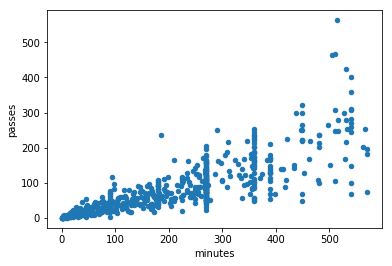

In [48]:
f = open('Players.csv','rU')
players = pd.read_csv(f)
players.plot.scatter(x='minutes', y='passes')
plt.show()

### (b) Linear regression
위의 데이터를 linear regression하시오. 위에서 그린 scatter plot을 다시 그리고 그위에 regression line을 적색으로 그리시오. x축 값의 범위는 실제 minutes값의 최소값과 최대값 범위로 한정하시오.

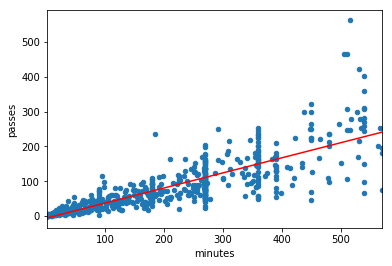

In [49]:
# Add linear regression
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.xlim(x1,x2)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

### (c) Correlation coefficient
위의 minutes와 passes 데이터 사이의 상관계수(correlation coefficient)를 구하여 1개의 실수값으로 소숫점이하 4자리까지 출력하시오.

In [50]:
print '{0:.4f}'.format(np.corrcoef(players.minutes, players.passes)[1,0])

0.8151
